<a href="https://colab.research.google.com/github/kimtomato/playground/blob/main/orange_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

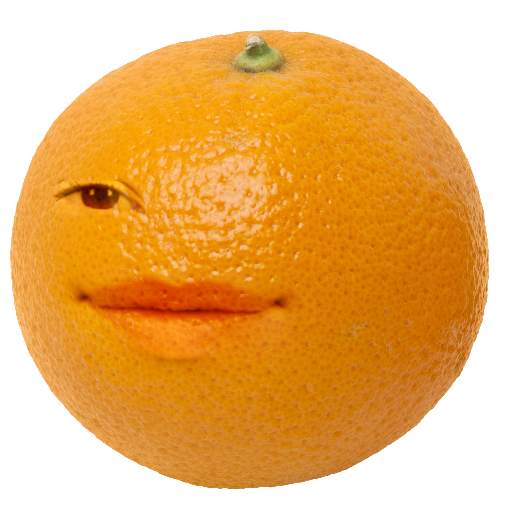

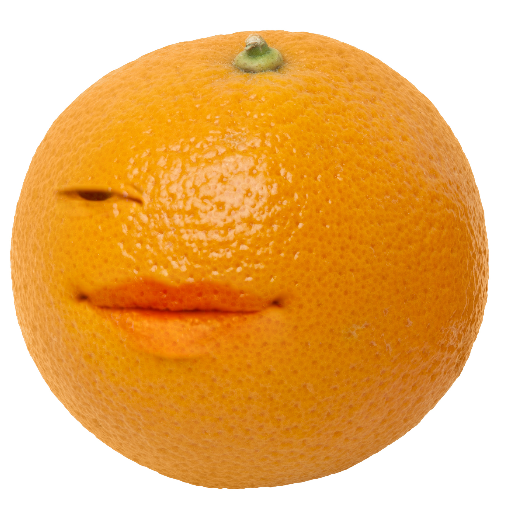

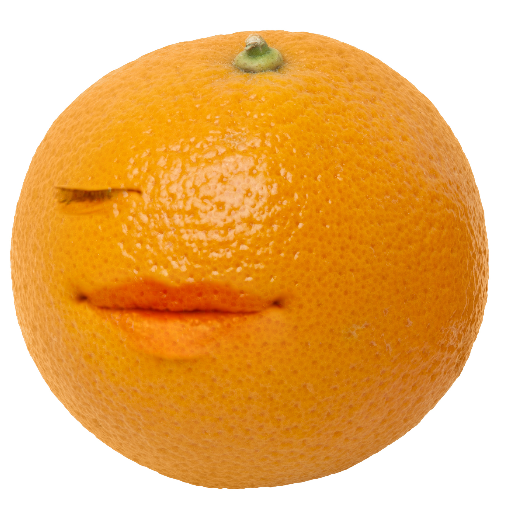

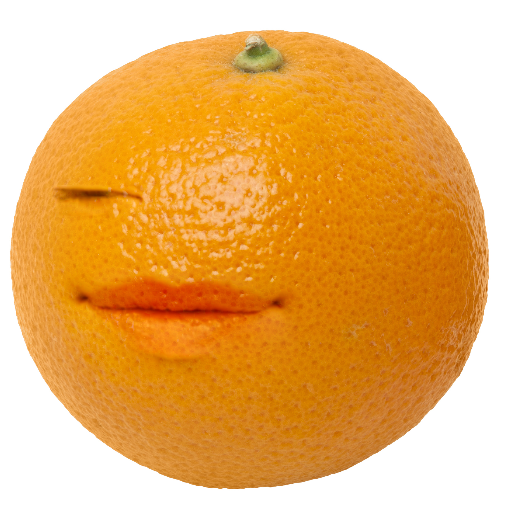

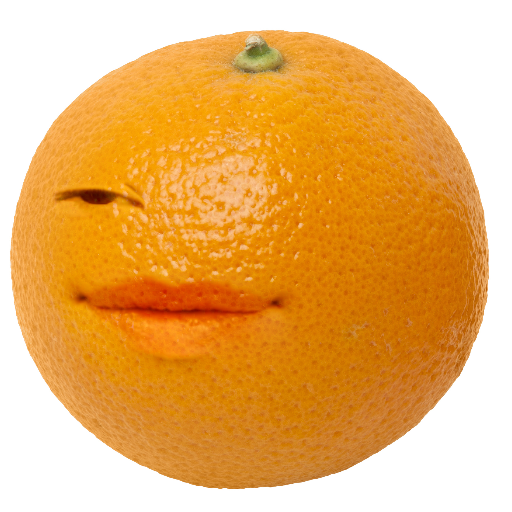

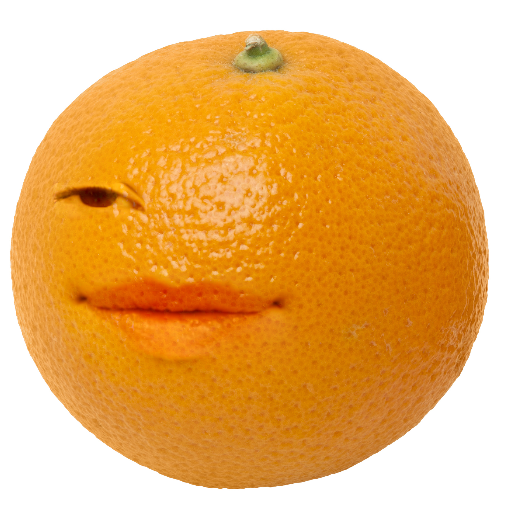

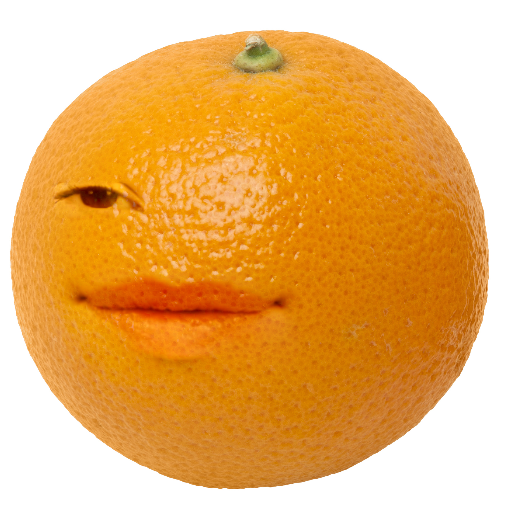

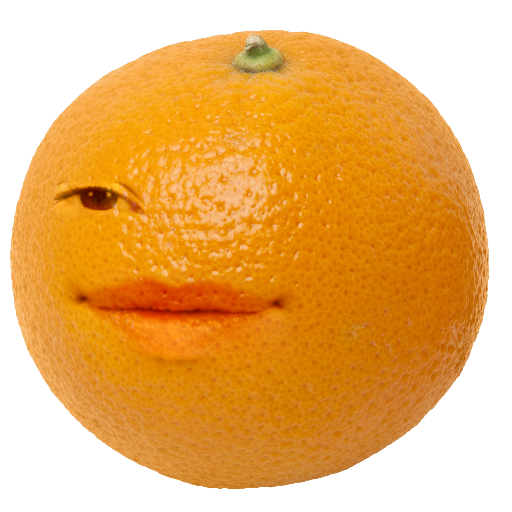

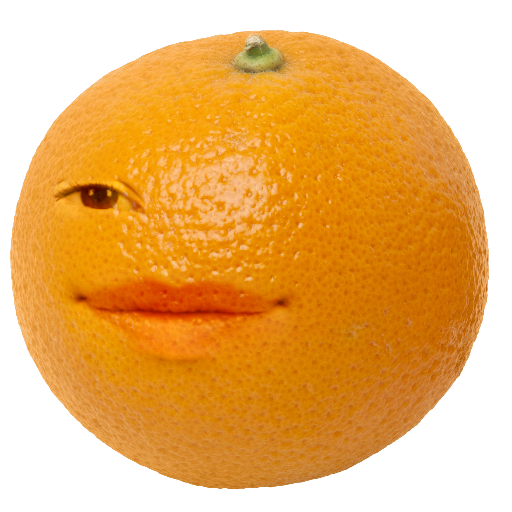

In [8]:
import cv2
import dlib
from imutils import face_utils, resize
import numpy as np

from google.colab.patches import cv2_imshow


org_img = cv2.imread('orange.jpg')
org_img = cv2.resize(org_img, dsize=(512,512))

#face detection
detector = dlib.get_frontal_face_detector()
#model file, landmark detection s
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

#opencv video capture ,    0 :  web_cam use
cap = cv2.VideoCapture('01.mp4')


while cap.isOpened():
    #image read
    ret, img = cap.read()

    #frame x -> break
    if not ret:
        break

    #face detection
    faces = detector(img)
    result = org_img.copy()

    #face coordinate
    if len(faces) > 0:
        face = faces[0]  # 1 face image use


        x1, y1, x2, y2 = face.left(), face.top(), face.right(),face.bottom()
        #face crop
        face_img = img[y1:y2, x1:x2].copy()

        shape = predictor(img, face)
        shape = face_utils.shape_to_np(shape)


        le_x1 = shape[36,0]
        le_y1 = shape[37,1]
        le_x2 = shape[39,0]
        le_y2 = shape[41,1]
        le_margin = int((le_x2 - le_x1)*0.18)

        re_x1 = shape[42, 0]
        re_y1 = shape[43, 1]
        re_x2 = shape[45, 0]
        re_y2 = shape[47, 1]
        re_margin = int((re_x2 - re_x1) * 0.18)

        left_eye_img = img[le_y1 - le_margin:le_y2+le_margin,le_x1 - le_margin:le_x2+le_margin].copy()
        right_eye_img = img[re_y1 - re_margin:re_y2+re_margin,re_y1 - re_margin:re_y2+re_margin].copy()

        left_eye_img = resize(left_eye_img, width=100)
        right_eye_img = resize(right_eye_img, width=100)

            result = cv2.seamlessClone(
            left_eye_img,
            result,
            np.full(left_eye_img.shape[:2], 255, left_eye_img.dtype),
            (100, 200),
            cv2.MIXED_CLONE
        )



        result = cv2.seamlessClone(
            right_eye_img,
            result,
            np.full(right_eye_img.shape[:2], 255, right_eye_img.dtype),
            (250,200),
            cv2.MIXED_CLONE
        )

     

        mouth_x1 = shape[48, 0]
        mouth_y1 = shape[50, 1]
        mouth_x2 = shape[54, 0]
        mouth_y2 = shape[57, 1]
        mouth_margin = int((mouth_x2 - mouth_x1) * 0.1)

        mouth_img =  img[mouth_y1-mouth_margin:mouth_y2+mouth_margin, mouth_x1-mouth_margin:mouth_x2+mouth_margin].copy()
        mouth_img = resize(mouth_img, width=250)

        result = cv2.seamlessClone(
            mouth_img,
            result,
            np.full(mouth_img.shape[:2], 255 , mouth_img.dtype),
            (180,320),
            cv2.MIXED_CLONE
        )

        cv2_imshow(result)

    if cv2.waitKey(1) == ord('q'):
        break


